In [1]:
import gbdt
from sklearn import metrics
import pandas as pd

In [2]:
def ComputeAUC(forest, data, targets):
    predictions = forest.predict(data)
    fpr, tpr, _ = metrics.roc_curve(targets, predictions, pos_label=1)
    return metrics.auc(fpr, tpr)

In [3]:
df = pd.read_csv('train.tsv', delimiter='\t')

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
config = {'loss_func': 'logloss',
          'num_trees': 100,
          'num_leaves': 12,
          'example_sampling_rate': 0.5,
          'feature_sampling_rate': 0.8,
          'pair_sampling_rate': 20,
          'min_hessian': 50,
          'shrinkage' : 0.05}

In [6]:
float_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [7]:
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [8]:
target_column = 'target'

In [9]:
training_data = gbdt.DataLoader.from_tsvs(tsvs=['train.tsv'],
                                          bucketized_float_cols=float_features,
                                          string_cols=cat_features + [target_column])
training_targets = list(map(lambda x: 1 if x=='>50K' else -1, training_data[target_column]))

In [10]:
testing_data = gbdt.DataLoader.from_tsvs(tsvs=['test.tsv'],
                                          bucketized_float_cols=float_features,
                                          string_cols=cat_features + [target_column])
testing_targets = list(map(lambda x: 1 if x=='>50K' else -1, testing_data[target_column]))

In [11]:
forest = gbdt.train(training_data,
                    y=training_targets,
                    features=float_features + cat_features,
                    config=config)

In [12]:
print ("Training AUC =", ComputeAUC(forest, training_data, training_targets))
print ("Testing AUC =", ComputeAUC(forest, testing_data, testing_targets))

Training AUC = 0.9228652193948579
Testing AUC = 0.9161781774849602


In [13]:
forest.feature_importance()

[('relationship', 1.0),
 ('capital-gain', 0.6120898863234928),
 ('marital-status', 0.5235976651686585),
 ('occupation', 0.4139503497840851),
 ('age', 0.3096430700074806),
 ('education-num', 0.30917146559227743),
 ('education', 0.16735061310389038),
 ('hours-per-week', 0.1422546436452378),
 ('capital-loss', 0.11825127361653291),
 ('workclass', 0.04094403680448024),
 ('native-country', 0.034161381549460884),
 ('fnlwgt', 0.022186954904719502),
 ('sex', 0.017457985853170644),
 ('race', 0.0029956572158538514)]

In [14]:
visualizer = gbdt.ForestVisualizer(forest)

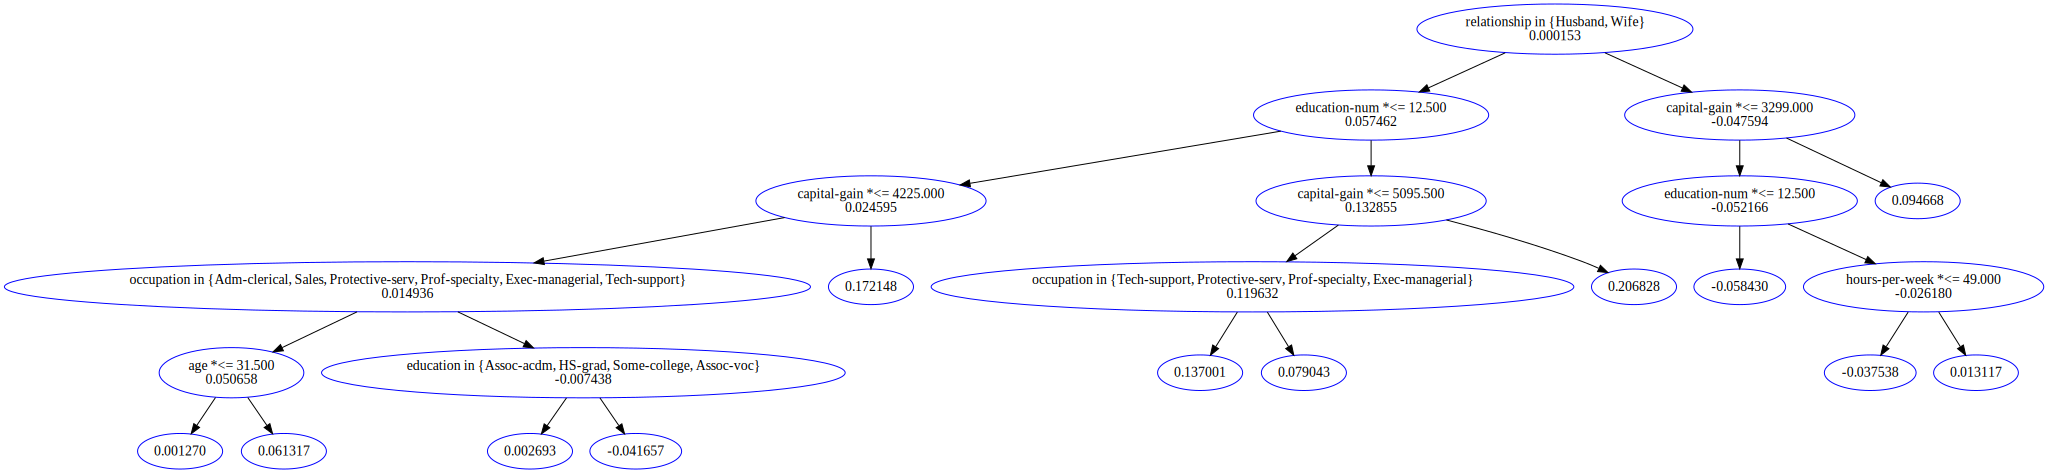

In [15]:
visualizer.visualize_tree(1)

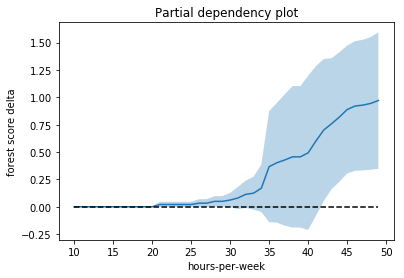

In [18]:
gbdt.plot_partial_dependency(forest, training_data, 'hours-per-week', list(range(10, 50)))